In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

import random
import re   
import string                          

import nltk
from nltk.corpus import twitter_samples
from nltk.corpus import stopwords          
from nltk.stem import PorterStemmer        
from nltk.tokenize import TweetTokenizer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [3]:
# Load Data
data = pd.read_csv('final_merged_ML.csv')

In [4]:
data.head()

,sentence,emotion,dataset_source,Sentiment_Score,POS_Tags,TF_IDF,GloVe_Embeddings,PERSON,ORG,GPE,...,Num_PERSON,Num_ORG,Num_GPE,Num_LOC,Num_NORP,Has_PERSON,Has_ORG,Has_GPE,Has_LOC,Has_NORP
0,That game hurt.,sadness,GoEmotions,-0.5267,DET NOUN VERB PUNCT,"{'game': 0.6107402745180438, 'hurt': 0.7918309...","[0.111194666666667, 0.135607333333333, -0.1884...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,"You do right, if you don't care then fuck 'em!",neutral,GoEmotions,0.1316,PRON AUX ADV PUNCT SCONJ PRON AUX PART VERB AD...,"{'right': 0.27278835247077626, 'don': 0.226821...","[-0.060132625000000, 0.015059875000000, -0.370...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,Man I love reddit.,happiness,GoEmotions,0.6369,INTJ PRON VERB PROPN PUNCT,"{'man': 0.30802558559831167, 'love': 0.2604358...","[0.051240000000000, 0.382370000000000, -0.2492...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,"Etenia was nowhere near them, he was by the Fa...",neutral,GoEmotions,0.0000,PROPN AUX ADV ADP PRON PUNCT PRON AUX ADP DET ...,"{'etenia': 0.7044442094807741, 'near': 0.70975...","[0.032060428571429, 0.113800000000000, -0.1042...",NaN,Falcon,Etenia,...,0.0,1.0,1.0,0.0,0.0,0,1,1,0,0
4,Right? Considering it's such an important docu...,happiness,GoEmotions,0.6239,INTJ PUNCT VERB PRON AUX DET DET ADJ NOUN PUNC...,"{'right': 0.18498978995980117, 'considering': ...","[0.001577235294118, 0.045637117647059, -0.2592...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [7]:
def clean_text(sentence):
    text = str(sentence).lower().strip()
    text = re.sub(r'[^a-zA-Z ]', '', sentence)  # Remove special characters
    return text

In [9]:
data['sentence'] = data['sentence'].astype(str)

In [11]:
data['clean_sentence'] = data['sentence'].apply(clean_text)

In [12]:
data.head()

,sentence,emotion,dataset_source,Sentiment_Score,POS_Tags,TF_IDF,GloVe_Embeddings,PERSON,ORG,GPE,...,Num_ORG,Num_GPE,Num_LOC,Num_NORP,Has_PERSON,Has_ORG,Has_GPE,Has_LOC,Has_NORP,clean_sentence
0,That game hurt.,sadness,GoEmotions,-0.5267,DET NOUN VERB PUNCT,"{'game': 0.6107402745180438, 'hurt': 0.7918309...","[0.111194666666667, 0.135607333333333, -0.1884...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,That game hurt
1,"You do right, if you don't care then fuck 'em!",neutral,GoEmotions,0.1316,PRON AUX ADV PUNCT SCONJ PRON AUX PART VERB AD...,"{'right': 0.27278835247077626, 'don': 0.226821...","[-0.060132625000000, 0.015059875000000, -0.370...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,You do right if you dont care then fuck em
2,Man I love reddit.,happiness,GoEmotions,0.6369,INTJ PRON VERB PROPN PUNCT,"{'man': 0.30802558559831167, 'love': 0.2604358...","[0.051240000000000, 0.382370000000000, -0.2492...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,Man I love reddit
3,"Etenia was nowhere near them, he was by the Fa...",neutral,GoEmotions,0.0000,PROPN AUX ADV ADP PRON PUNCT PRON AUX ADP DET ...,"{'etenia': 0.7044442094807741, 'near': 0.70975...","[0.032060428571429, 0.113800000000000, -0.1042...",NaN,Falcon,Etenia,...,1.0,1.0,0.0,0.0,0,1,1,0,0,Etenia was nowhere near them he was by the Falcon
4,Right? Considering it's such an important docu...,happiness,GoEmotions,0.6239,INTJ PUNCT VERB PRON AUX DET DET ADJ NOUN PUNC...,"{'right': 0.18498978995980117, 'considering': ...","[0.001577235294118, 0.045637117647059, -0.2592...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,Right Considering its such an important docume...


In [17]:
# NLP Features Extraction
vectorizer_tfidf = TfidfVectorizer()
vectorizer_count = CountVectorizer()

X_tfidf = vectorizer_tfidf.fit_transform(data['clean_sentence'])
X_count = vectorizer_count.fit_transform(data['clean_sentence'])

In [18]:
# Merge all features
X_combined = np.hstack((X_tfidf.toarray(), X_count.toarray(), sentiment_scores))

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, data['emotion'], test_size=0.2, random_state=42)

In [21]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=500)

In [22]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [23]:
y_pred_log = log_reg.predict(X_test)

In [24]:
log_f1 = f1_score(y_test, y_pred_log, average='weighted')

In [25]:
print("Logistic Regression F1-score:", log_f1)

Logistic Regression F1-score: 0.5207734402497516


In [26]:
log_accuracy = accuracy_score(y_test, y_pred_log)
print("Accuracy:", log_accuracy)

Accuracy: 0.535445132038478


In [27]:
log_precision = precision_score(y_test, y_pred_log, average='weighted')
print("Precision:", log_precision)

Precision: 0.5200072613458857


In [28]:
log_recall = recall_score(y_test, y_pred_log, average='weighted')
print("Recall:", log_recall)

Recall: 0.535445132038478


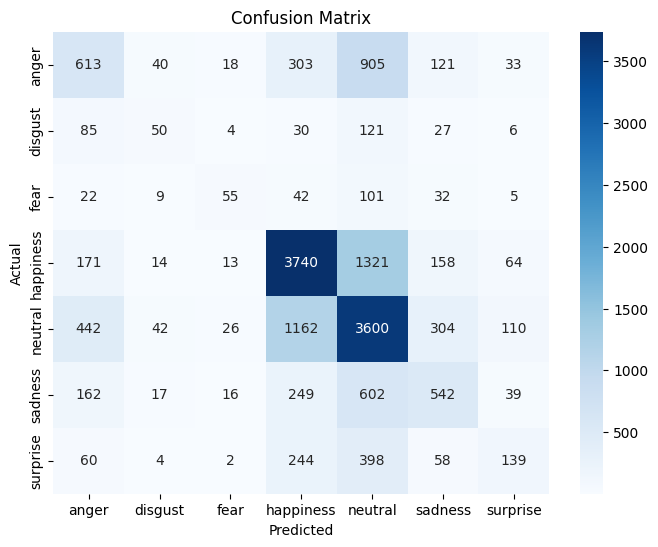

In [31]:
# Confusion Matrix
emotion_labels = sorted(data["emotion"].unique())
cm = confusion_matrix(y_test, y_pred_log, labels=emotion_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()